In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score ,classification_report

In [63]:
#read the data
cred_data=pd.read_csv(r'C:\Users\jiten\Downloads\crx.data',header=None,na_values='?')

In [64]:
cred_data.columns=['A'+str(i) for i in cred_data.columns]

In [65]:
cred_data.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [66]:
cred_data.tail()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [67]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      678 non-null    object 
 1   A1      678 non-null    float64
 2   A2      690 non-null    float64
 3   A3      684 non-null    object 
 4   A4      684 non-null    object 
 5   A5      681 non-null    object 
 6   A6      681 non-null    object 
 7   A7      690 non-null    float64
 8   A8      690 non-null    object 
 9   A9      690 non-null    object 
 10  A10     690 non-null    int64  
 11  A11     690 non-null    object 
 12  A12     690 non-null    object 
 13  A13     677 non-null    float64
 14  A14     690 non-null    int64  
 15  A15     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [68]:
cred_data.isnull().sum()

A0     12
A1     12
A2      0
A3      6
A4      6
A5      9
A6      9
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13    13
A14     0
A15     0
dtype: int64

In [69]:
cred_data.A15.value_counts() / len(cred_data) *100

-    55.507246
+    44.492754
Name: A15, dtype: float64

In [70]:
cred_data.A15 = cred_data.A15.apply(lambda x : 1 if x=='+' else 0)

In [71]:
cred_data.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [72]:
cred_data.A15.value_counts()

0    383
1    307
Name: A15, dtype: int64

In [73]:
cred_data.A0.value_counts()

b    468
a    210
Name: A0, dtype: int64

In [79]:
cred_data.A0.mode()[0]

'b'

In [80]:
cred_data.A0.fillna(cred_data.A0.mode()[0],inplace=True)
cred_data=pd.get_dummies(cred_data,columns=['A0'],drop_first=True)

In [81]:
cred_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A0_b
0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,1
1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,0
2,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,0
3,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,1
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,1


In [82]:
cred_data.A3.value_counts()

u    519
y    163
l      2
Name: A3, dtype: int64

In [83]:
cred_data.A3.fillna(cred_data.A3.mode()[0],inplace=True)

In [84]:
cred_data.A6.value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: A6, dtype: int64

In [88]:
cred_data.isnull().sum()

A1      12
A2       0
A3       0
A4       6
A5       9
A6       9
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13     13
A14      0
A15      0
A0_b     0
dtype: int64

In [87]:
cred_data.select_dtypes('object')

,A3,A4,A5,A6,A8,A9,A11,A12
0,u,g,w,v,t,t,f,g
1,u,g,q,h,t,t,f,g
2,u,g,q,h,t,f,f,g
3,u,g,w,v,t,t,t,g
4,u,g,w,v,t,f,f,s
...,...,...,...,...,...,...,...,...
685,y,p,e,h,f,f,f,g
686,u,g,c,v,f,t,t,g
687,y,p,ff,ff,f,t,t,g
688,u,g,aa,v,f,f,f,g


In [89]:
cred_data.A4.fillna(cred_data.A4.mode()[0],inplace=True)
cred_data.A5.fillna(cred_data.A5.mode()[0],inplace=True)
cred_data.A6.fillna(cred_data.A6.mode()[0],inplace=True)

In [90]:
cred_data.isnull().sum()

A1      12
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13     13
A14      0
A15      0
A0_b     0
dtype: int64

In [92]:
cred_data.A1.fillna(cred_data.A1.mean(),inplace=True)

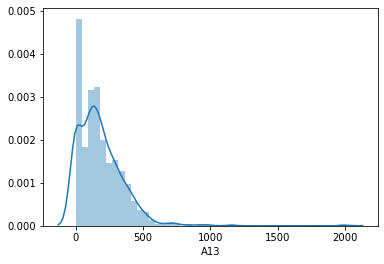

In [96]:
sns.distplot(cred_data.A13)

In [102]:
cred_data.A13.fillna(cred_data.A13.median(),inplace=True)

In [103]:
cred_data.isnull().sum()

A1      0
A2      0
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A0_b    0
dtype: int64

In [104]:
cols=['A3','A4','A8','A9','A11','A12']

In [105]:
cred_data=pd.get_dummies(cred_data,columns=cols,drop_first=True)

In [106]:
cred_data.head()

,A1,A2,A5,A6,A7,A10,A13,A14,A15,A0_b,A3_u,A3_y,A4_gg,A4_p,A8_t,A9_t,A11_t,A12_p,A12_s
0,30.83,0.000,w,v,1.25,1,202.0,0,1,1,1,0,0,0,1,1,0,0,0
1,58.67,4.460,q,h,3.04,6,43.0,560,1,0,1,0,0,0,1,1,0,0,0
2,24.50,0.500,q,h,1.50,0,280.0,824,1,0,1,0,0,0,1,0,0,0,0
3,27.83,1.540,w,v,3.75,5,100.0,3,1,1,1,0,0,0,1,1,1,0,0
4,20.17,5.625,w,v,1.71,0,120.0,0,1,1,1,0,0,0,1,0,0,0,1


In [107]:
Le=LabelEncoder()
cred_data.A5=Le.fit_transform(np.array(cred_data.A5).reshape(-1,1))
cred_data.A6=Le.fit_transform(np.array(cred_data.A6).reshape(-1,1))

C:\Users\jiten\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jiten\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
cred_data.head()

,A1,A2,A5,A6,A7,A10,A13,A14,A15,A0_b,A3_u,A3_y,A4_gg,A4_p,A8_t,A9_t,A11_t,A12_p,A12_s
0,30.83,0.000,12,7,1.25,1,202.0,0,1,1,1,0,0,0,1,1,0,0,0
1,58.67,4.460,10,3,3.04,6,43.0,560,1,0,1,0,0,0,1,1,0,0,0
2,24.50,0.500,10,3,1.50,0,280.0,824,1,0,1,0,0,0,1,0,0,0,0
3,27.83,1.540,12,7,3.75,5,100.0,3,1,1,1,0,0,0,1,1,1,0,0
4,20.17,5.625,12,7,1.71,0,120.0,0,1,1,1,0,0,0,1,0,0,0,1


In [109]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    float64
 2   A5      690 non-null    int32  
 3   A6      690 non-null    int32  
 4   A7      690 non-null    float64
 5   A10     690 non-null    int64  
 6   A13     690 non-null    float64
 7   A14     690 non-null    int64  
 8   A15     690 non-null    int64  
 9   A0_b    690 non-null    uint8  
 10  A3_u    690 non-null    uint8  
 11  A3_y    690 non-null    uint8  
 12  A4_gg   690 non-null    uint8  
 13  A4_p    690 non-null    uint8  
 14  A8_t    690 non-null    uint8  
 15  A9_t    690 non-null    uint8  
 16  A11_t   690 non-null    uint8  
 17  A12_p   690 non-null    uint8  
 18  A12_s   690 non-null    uint8  
dtypes: float64(4), int32(2), int64(3), uint8(10)
memory usage: 50.0 KB


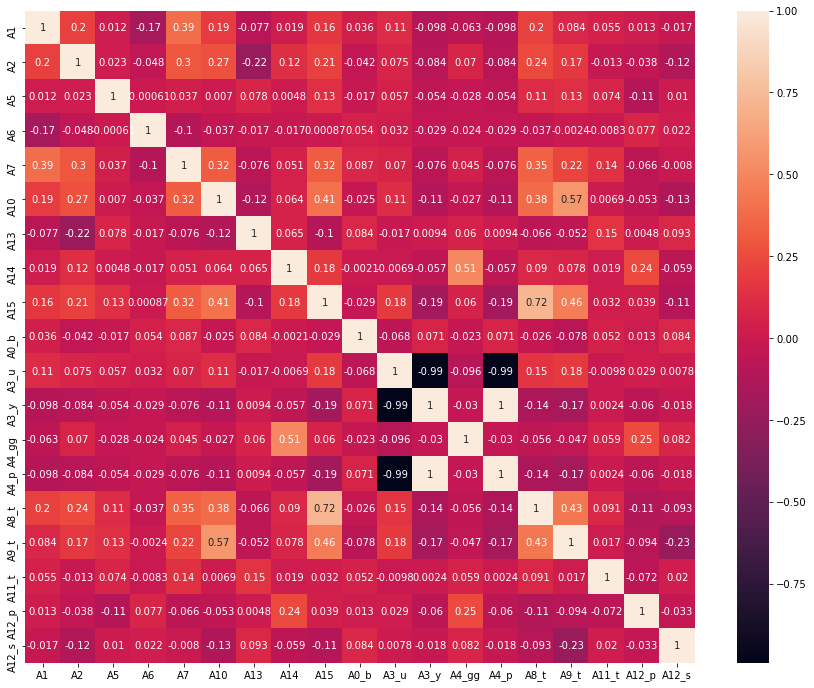

In [115]:
plt.figure(figsize=(15,12))
sns.heatmap(cred_data.corr(),annot=True)

In [118]:
cred_data.drop('A3_u',axis=1,inplace=True)

In [138]:
min_max=MinMaxScaler(feature_range=(0,5))
for col in x.iloc[:,:8].columns:
    cred_data[col]=min_max.fit_transform(np.array(cred_data[col]).reshape(-1,1))

In [139]:
cred_data.head()

,A1,A2,A5,A6,A7,A10,A13,A14,A15,A0_b,A3_y,A4_gg,A4_p,A8_t,A9_t,A11_t,A12_p,A12_s
0,1.284211,0.000000,4.615385,4.375,0.219298,0.074627,0.5050,0.00000,1,1,0,0,0,1,1,0,0,0
1,3.377444,0.796429,3.846154,1.875,0.533333,0.447761,0.1075,0.02800,1,0,0,0,0,1,1,0,0,0
2,0.808271,0.089286,3.846154,1.875,0.263158,0.000000,0.7000,0.04120,1,0,0,0,0,1,0,0,0,0
3,1.058647,0.275000,4.615385,4.375,0.657895,0.373134,0.2500,0.00015,1,1,0,0,0,1,1,1,0,0
4,0.482707,1.004464,4.615385,4.375,0.300000,0.000000,0.3000,0.00000,1,1,0,0,0,1,0,0,0,1


In [140]:
x=cred_data.drop('A15',axis=1)
y=cred_data.A15

In [141]:
Log_reg=LogisticRegression()

In [142]:
import sklearn

In [143]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [145]:
cross_val_score(Log_reg,x,y,cv=5,scoring='accuracy',n_jobs=1)

array([0.63043478, 0.96376812, 0.94202899, 0.7826087 , 0.91304348])

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [147]:
Log_reg.fit(x_train,y_train)

LogisticRegression()

In [149]:
accuracy_score(y_test, Log_reg.predict(x_test))

0.8623188405797102

In [150]:
confusion_matrix(y_test , Log_reg.predict(x_test))

array([[63, 14],
       [ 5, 56]], dtype=int64)

In [151]:
precision_score(y_test , Log_reg.predict(x_test))

0.8

In [152]:
recall_score(y_test , Log_reg.predict(x_test))

0.9180327868852459

In [157]:
Log_reg.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1], dtype=int64)

In [174]:
pred=np.where (Log_reg.predict_proba(x_test) < 0.3 , 1, 0)

In [167]:
model_pred=Log_reg.predict_proba(x_test) 
model_pred 

array([[3.52424949e-02, 9.64757505e-01],
       [9.21934572e-01, 7.80654281e-02],
       [2.40061843e-01, 7.59938157e-01],
       [3.02853531e-01, 6.97146469e-01],
       [3.18089241e-01, 6.81910759e-01],
       [8.86182862e-03, 9.91138171e-01],
       [9.22130114e-01, 7.78698859e-02],
       [9.32775257e-01, 6.72247428e-02],
       [6.16692728e-02, 9.38330727e-01],
       [3.10998255e-02, 9.68900174e-01],
       [9.48254584e-01, 5.17454159e-02],
       [7.88291881e-02, 9.21170812e-01],
       [1.10815126e-01, 8.89184874e-01],
       [9.58327133e-02, 9.04167287e-01],
       [9.43989043e-01, 5.60109571e-02],
       [3.36379037e-01, 6.63620963e-01],
       [1.41944212e-01, 8.58055788e-01],
       [1.45079753e-01, 8.54920247e-01],
       [1.84209380e-01, 8.15790620e-01],
       [7.82527354e-02, 9.21747265e-01],
       [8.88450783e-01, 1.11549217e-01],
       [9.20865595e-01, 7.91344051e-02],
       [8.70263387e-01, 1.29736613e-01],
       [9.11462846e-01, 8.85371536e-02],
       [8.326751

In [169]:
classification_report(y_test , Log_reg.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.93      0.82      0.87        77\n           1       0.80      0.92      0.85        61\n\n    accuracy                           0.86       138\n   macro avg       0.86      0.87      0.86       138\nweighted avg       0.87      0.86      0.86       138\n'

In [175]:
confusion_matrix(y_test , pred)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [178]:
pred

array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0,